In [1]:
import os
import requests

In [2]:
# Get PDF document path
pdf_path = "human-nutrition-text.pdf"

# Download PDF
if not os.path.exists(pdf_path):
    print(f"[INFO] File doesn't exist, downloading...")

    url = 'https://pressbooks.oer.hawaii.edu/humannutrition2/open/download?type=pdf'

    # The local filename to save the downloaded file
    filename = pdf_path

    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200: 
        # open the file and save it 
        with open(filename, 'wb') as file:
            file.write(response.content)
        print(f"[INFO] The file has been download and saved as {filename}")
    else:
        print(f"[INFO] Failed to dowload the file. Status code: {response.status_code}")
else: 
    print(f"File {pdf_path} exists")

File human-nutrition-text.pdf exists


In [3]:
import fitz
from tqdm.auto import tqdm

def text_formatter(text: str) -> str:
    """Performs minor formatting on text."""
    cleaned_text = text.replace("\n", " ").strip()

    # Potentially more text formatting functions can go here.
    return cleaned_text

def open_and_read_pdf(pdf_path: str) -> list[dict]:
    doc = fitz.open(pdf_path)
    pages_and_texts = []
    for page_number, page in tqdm(enumerate(doc)):
        text = page.get_text()
        text = text_formatter(text=text)
        pages_and_texts.append({"page_number": page_number - 41, 
                                "page_char_count":len(text), 
                                "page_word_count": len(text.split(" ")),
                                "page_sentence_count_raw": len(text.split(". ")),
                                "page_token_count": len(text)/4, 
                                "text":text})
        
    return pages_and_texts
    
pages_and_texts = open_and_read_pdf(pdf_path=pdf_path)
pages_and_texts[:2]

/opt/anaconda3/envs/rag/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
1208it [00:01, 1164.69it/s]


[{'page_number': -41,
  'page_char_count': 29,
  'page_word_count': 4,
  'page_sentence_count_raw': 1,
  'page_token_count': 7.25,
  'text': 'Human Nutrition: 2020 Edition'},
 {'page_number': -40,
  'page_char_count': 0,
  'page_word_count': 1,
  'page_sentence_count_raw': 1,
  'page_token_count': 0.0,
  'text': ''}]

In [4]:
import random

random.sample(pages_and_texts, k=3)

[{'page_number': 1005,
  'page_char_count': 1077,
  'page_word_count': 150,
  'page_sentence_count_raw': 13,
  'page_token_count': 269.25,
  'text': 'mycotoxins affect 25 percent of the world’s food crops. They are  found primarily in grains and nuts, but other sources include apples,  celery, and other produce.  The most dangerous mycotoxins are aflatoxins, which are  produced by strains of fungi called Aspergillus under certain  temperature and humidity conditions. Contamination has occurred  in peanuts, tree nuts, and corn. Aflatoxins can cause aflatoxicosis  in humans, livestock, and domestic animals. Symptoms include  vomiting and abdominal pain. Possible complications include liver  failure, liver cancer, and even death. Many countries try to limit  exposure to aflatoxins by monitoring their presence on food and  feed products.5  5.\xa0Molds on Food: Are They Dangerous?.(2013). \xa0US  Department of Agriculture, Food Safety and Inspection  Service. https://www.fsis.usda.gov/wps/p

In [5]:
import pandas as pd

df = pd.DataFrame(pages_and_texts)
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,text
0,-41,29,4,1,7.25,Human Nutrition: 2020 Edition
1,-40,0,1,1,0.00,
2,-39,320,54,1,80.00,Human Nutrition: 2020 Edition UNIVERSITY OF ...
3,-38,212,32,1,53.00,Human Nutrition: 2020 Edition by University of...
4,-37,797,145,2,199.25,Contents Preface University of Hawai‘i at Mā...


In [6]:
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count
count,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,198.30,9.97,287.00
std,348.86,560.38,95.76,6.19,140.10
min,-41.00,0.00,1.00,1.00,0.00
25%,260.75,762.00,134.00,4.00,190.50
50%,562.50,1231.50,214.50,10.00,307.88
75%,864.25,1603.50,271.00,14.00,400.88
max,1166.00,2308.00,429.00,32.00,577.00


In [7]:
# importing an embedding model 
from spacy.lang.en import English

nlp = English() # Using spacy
nlp.add_pipe("sentencizer")


In [8]:
# testing the sentencizer
doc = nlp("this is a sentence. This is another sentence? I'm a rocket man.")
assert len(list(doc.sents)) == 3
list(doc.sents)

[this is a sentence., This is another sentence?, I'm a rocket man.]

In [9]:
import pprint as pprint
pprint.pprint(pages_and_texts[20]['text'])

('The Benefits of Physical Activity  University of Hawai‘i at Mānoa Food '
 'Science and  Human Nutrition Program and Human Nutrition  Program  945  Fuel '
 'Sources  University of Hawai‘i at Mānoa Food Science and  Human Nutrition '
 'Program and Human Nutrition  Program  950  Sports Nutrition  University of '
 'Hawai‘i at Mānoa Food Science and  Human Nutrition Program and Human '
 'Nutrition  Program  959  Water and Electrolyte Needs  University of Hawai‘i '
 'at Mānoa Food Science and  Human Nutrition Program and Human Nutrition  '
 'Program  972  Food Supplements and Food Replacements  University of Hawai‘i '
 'at Mānoa Food Science and  Human Nutrition Program and Human Nutrition  '
 'Program  977  Part\xa0XVII.\xa0Chapter 17. Food Safety  Introduction  '
 'University of Hawai‘i at Mānoa Food Science and  Human Nutrition Program and '
 'Human Nutrition  Program  987  The Major Types of Foodborne Illness  '
 'University of Hawai‘i at Mānoa Food Science and  Human Nutrition Program

In [10]:
# Chunking the pages into sentences
for item in tqdm(pages_and_texts):
    item["sentences"] = list(nlp(item["text"]).sents)

    # Make sure all sentences are strings
    item["sentences"] = [str(sentence) for sentence in item["sentences"]]

    # Count the sentences
    item["page_sentence_count_spacy"] = len(item["sentences"])

100%|██████████| 1208/1208 [00:01<00:00, 862.20it/s]


In [11]:
pprint.pprint(pages_and_texts[20]['sentences'])

['The Benefits of Physical Activity  University of Hawai‘i at Mānoa Food '
 'Science and  Human Nutrition Program and Human Nutrition  Program  945  Fuel '
 'Sources  University of Hawai‘i at Mānoa Food Science and  Human Nutrition '
 'Program and Human Nutrition  Program  950  Sports Nutrition  University of '
 'Hawai‘i at Mānoa Food Science and  Human Nutrition Program and Human '
 'Nutrition  Program  959  Water and Electrolyte Needs  University of Hawai‘i '
 'at Mānoa Food Science and  Human Nutrition Program and Human Nutrition  '
 'Program  972  Food Supplements and Food Replacements  University of Hawai‘i '
 'at Mānoa Food Science and  Human Nutrition Program and Human Nutrition  '
 'Program  977  Part\xa0XVII.',
 '\xa0Chapter 17.',
 'Food Safety  Introduction  University of Hawai‘i at Mānoa Food Science and  '
 'Human Nutrition Program and Human Nutrition  Program  987  The Major Types '
 'of Foodborne Illness  University of Hawai‘i at Mānoa Food Science and  Human '
 'Nutritio

In [12]:
random.sample(pages_and_texts, k=1)

[{'page_number': 378,
  'page_char_count': 1088,
  'page_word_count': 197,
  'page_sentence_count_raw': 5,
  'page_token_count': 272.0,
  'text': 'Image by  Allison  Calabrese /  CC BY 4.0  Protein Digestion and  Absorption  UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN  NUTRITION PROGRAM AND HUMAN NUTRITION PROGRAM  How do the proteins from foods, denatured or not, get processed  into amino acids that cells can use to make new proteins? When you  eat food the body’s digestive system breaks down the protein into  the individual amino acids, which are absorbed and used by cells to  build other proteins and a few other macromolecules, such as DNA.  We previously discussed the general process of food digestion,\xa0 let’s  follow the specific path that proteins take down the gastrointestinal  tract and into the circulatory system (Figure 6.7 “Digestion and  Absorption of Protein”). Eggs are a good dietary source of protein  and will be used as our example to describe the path of pr

In [13]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,198.30,9.97,287.00,10.32
std,348.86,560.38,95.76,6.19,140.10,6.30
min,-41.00,0.00,1.00,1.00,0.00,0.00
25%,260.75,762.00,134.00,4.00,190.50,5.00
50%,562.50,1231.50,214.50,10.00,307.88,10.00
75%,864.25,1603.50,271.00,14.00,400.88,15.00
max,1166.00,2308.00,429.00,32.00,577.00,28.00


##### Chunking our sentences together (how many sentences you use is entirely up to you)

In [14]:
# Define slipt seze to turn groups of sentences into chunks
num_sentence_chunk_size = 10

# create a functino to split lists of texts recursively into chunk size
# e.g. [20] -> [10, 10] or [25] -> [10, 10, 5]

def split_list(input_list: list[str], slice_size: int = num_sentence_chunk_size) -> list[list[str]]:
    return [input_list[i:i + slice_size] for i in range (0, len(input_list), slice_size)]

test_list = list(range(25))
split_list(test_list)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [15]:
# Loop through pages and texts and split sentences into chunks 
for item in tqdm(pages_and_texts):
    item["sentence_chunks"] = split_list(input_list=item["sentences"], slice_size=num_sentence_chunk_size)
    item["num_chunks"] = len(item["sentence_chunks"])

100%|██████████| 1208/1208 [00:00<00:00, 954364.14it/s]


In [16]:
random.sample(pages_and_texts, k=1)

[{'page_number': 1012,
  'page_char_count': 1874,
  'page_word_count': 319,
  'page_sentence_count_raw': 22,
  'page_token_count': 468.5,
  'text': 'The USDA and the FDA enforce laws regarding the safety of  domestic and imported food. In addition, the Federal Food, Drug,  and Cosmetic Act of 1938 gives the FDA authority over food  ingredients. The FDA enforces the safety of domestic and imported  foods. It also monitors supplements, food labels, claims that  corporations  make  about  the  benefits  of  products,  and  pharmaceutical  drugs.  Sometimes,  the  FDA  must  recall  contaminated foods and remove them from the market to protect  public health. For example, in 2011 contaminated peanut butter led  to the recall of thousands of jars of a few popular brands.2 Recalls  are almost always voluntary and often are requested by companies  after a problem has been discovered. In rare cases, the FDA will  request a recall. But no matter what triggers the removal of a  product, the FDA’

In [17]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy,num_chunks
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,198.30,9.97,287.00,10.32,1.53
std,348.86,560.38,95.76,6.19,140.10,6.30,0.64
min,-41.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,260.75,762.00,134.00,4.00,190.50,5.00,1.00
50%,562.50,1231.50,214.50,10.00,307.88,10.00,1.00
75%,864.25,1603.50,271.00,14.00,400.88,15.00,2.00
max,1166.00,2308.00,429.00,32.00,577.00,28.00,3.00


#### Splitting each chunk into its own item

In [18]:
import re

# Split each chunk into its own item 
pages_and_chunks = []

for item in tqdm(pages_and_texts):
    for sentence_chunk in item["sentence_chunks"]:
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_number"]

        # Join the sentences into a paragraph-lik structure, aka join the list of sentences into one paragraph
        joined_sentence_chunk = "".join(sentence_chunk).replace("  ", " ").strip()
        # Taking care of no space after a "."
        joined_sentence_chunk = re.sub(r'\.([A-Z])',r'. \1', joined_sentence_chunk)

        chunk_dict["sentence_chunk"] = joined_sentence_chunk

        # Get some statistics on the chunks
        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk)/4 # 1 token = ~4 chars

        pages_and_chunks.append(chunk_dict)

len(pages_and_chunks)

100%|██████████| 1208/1208 [00:00<00:00, 60231.32it/s]


1843

In [19]:
print(random.sample(pages_and_chunks, k=1))

[{'page_number': 122, 'sentence_chunk': 'It is found at the ends of long bones, in the cores of vertebrae, and in the pelvis. Trabecular bone tissue makes up about 20 percent of the adult skeleton. The more 122 | The Skeletal System', 'chunk_char_count': 191, 'chunk_word_count': 37, 'chunk_token_count': 47.75}]


In [20]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,1843.00,1843.00,1843.00,1843.00
mean,583.38,734.44,112.33,183.61
std,347.79,447.54,71.22,111.89
min,-41.00,12.00,3.00,3.00
25%,280.50,315.00,44.00,78.75
50%,586.00,746.00,114.00,186.50
75%,890.00,1118.50,173.00,279.62
max,1166.00,1831.00,297.00,457.75


#### Filter chunks of text for short chunks

Now based on the stats, we can get rid of text that are below a certain number of tokens.

In [21]:
min_token_length = 30
for row in df[df["chunk_token_count"] <= min_token_length].sample(5).iterrows():
    print(f'Chunk token count: {row[1]["chunk_token_count"]} | Text: {row[1]["sentence_chunk"]}')

Chunk token count: 9.25 | Text: Protein’s Functions in the Body | 387
Chunk token count: 13.0 | Text: Accessed October 5, 2017. 540 | Fat-Soluble Vitamins
Chunk token count: 12.75 | Text: PART VIII CHAPTER 8. ENERGY Chapter 8. Energy | 451
Chunk token count: 15.25 | Text: Accessed November 30, 2017. Discovering Nutrition Facts | 737
Chunk token count: 9.25 | Text: 490 | Factors Affecting Energy Intake


In [22]:
pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length].to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2]

[{'page_number': -39,
  'sentence_chunk': 'Human Nutrition: 2020 Edition UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN NUTRITION PROGRAM ALAN TITCHENAL, SKYLAR HARA, NOEMI ARCEO CAACBAY, WILLIAM MEINKE-LAU, YA-YUN YANG, MARIE KAINOA FIALKOWSKI REVILLA, JENNIFER DRAPER, GEMADY LANGFELDER, CHERYL GIBBY, CHYNA NICOLE CHUN, AND ALLISON CALABRESE',
  'chunk_char_count': 308,
  'chunk_word_count': 42,
  'chunk_token_count': 77.0},
 {'page_number': -38,
  'sentence_chunk': 'Human Nutrition: 2020 Edition by University of Hawai‘i at Mānoa Food Science and Human Nutrition Program is licensed under a Creative Commons Attribution 4.0 International License, except where otherwise noted.',
  'chunk_char_count': 210,
  'chunk_word_count': 30,
  'chunk_token_count': 52.5}]

In [23]:
random.sample(pages_and_chunks_over_min_token_len, k=1)

[{'page_number': 176,
  'sentence_chunk': 'To do so, they pass through intestinal cells on their way to the blood. The transport of nutrients through intestinal cells is facilitated by the sodium-potassium pump, which by moving sodium out of the cell, creates a higher sodium concentration outside of the cell (requiring ATP). 176 | Sodium',
  'chunk_char_count': 296,
  'chunk_word_count': 49,
  'chunk_token_count': 74.0}]

#### Embedding Chunks

In [24]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2", 
                                      device="cuda")

/opt/anaconda3/envs/rag/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [25]:
# Trying out the embedding model
sentences = ["I hope today is great!", "I love the Lord", "There is no place like home"]

# Creating the embeddings
embeddings = embedding_model.encode(sentences)
embeddings_dict = dict(zip(sentences, embeddings))

# See the embeddings
for sentence, embeddings in embeddings_dict.items():
    print(f"Sentence: {sentence}")
    print(f"Embedding: {embeddings}")
    print("")

Sentence: I hope today is great!
Embedding: [-3.95806842e-02 -1.53433057e-02 -6.20222166e-02  8.79131258e-03
  7.18121007e-02 -3.35575081e-02 -2.48600878e-02  2.60403454e-02
  2.57075448e-02  3.45580205e-02 -3.40429470e-02 -2.73497719e-02
 -5.23456782e-02  1.81770101e-02  1.58037581e-02 -5.16345352e-02
 -7.95881171e-03 -1.21757193e-02 -2.48246957e-02  1.09437332e-02
  8.77541956e-03 -1.56278033e-02  3.42786238e-02 -2.81124692e-02
 -3.37876491e-02  5.72716929e-02  2.38610189e-02  4.17785496e-02
 -2.46064551e-02 -5.48913106e-02 -4.86337394e-02  1.41443005e-02
  1.40131349e-02 -8.70914664e-03  1.72636294e-06 -3.42979766e-02
  1.44509599e-02 -3.97097357e-02 -4.74465676e-02 -2.28063874e-02
 -3.78606431e-02 -6.94065914e-02 -6.69399276e-02  2.80630663e-02
  3.82952318e-02 -3.99278365e-02  2.94171777e-02  5.31775691e-02
 -3.78501378e-02  1.76462717e-02 -1.67117622e-02 -7.90661387e-03
  3.40730771e-02  1.90852210e-02  6.23578355e-02  7.41934702e-02
 -7.18189077e-03  3.83155532e-02  1.39820296e-

In [26]:
# %%time

# embedding_model.to("cuda")

# for item in tqdm(pages_and_chunks_over_min_token_len):
#     item["embedding"] = embedding_model.encode(item["sentence_chunk"])

In [27]:
# # Batching

# text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]
# text_chunks[83]

In [28]:
# create embeddings 
text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len] 
embeddings = embedding_model.encode(text_chunks, batch_size=32, convert_to_tensor=True)

for i, item in enumerate(pages_and_chunks_over_min_token_len):
    item["embedding"] = embeddings[i].cpu().numpy()

In [29]:
embeddings

tensor([[ 0.0674,  0.0902, -0.0051,  ..., -0.0221, -0.0232,  0.0126],
        [ 0.0552,  0.0592, -0.0166,  ..., -0.0120, -0.0103,  0.0227],
        [ 0.0280,  0.0340, -0.0206,  ..., -0.0054,  0.0213,  0.0313],
        ...,
        [ 0.0771,  0.0098, -0.0122,  ..., -0.0409, -0.0752, -0.0241],
        [ 0.1030, -0.0165,  0.0083,  ..., -0.0574, -0.0283, -0.0295],
        [ 0.0864, -0.0125, -0.0113,  ..., -0.0522, -0.0337, -0.0299]],
       device='cuda:0')

In [30]:
# %%time

# # Embed all texts in batches
# text_chunks_embeddings = embedding_model.encode(text_chunks, batch_size=32, convert_to_tensor=True)
# text_chunks_embeddings

In [31]:
# text_chunks_embeddings[0].cpu().numpy()

In [32]:
# Save the embeddings to file

text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
embeddings_df_save_path = "text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path, index=False)

In [33]:
pages_and_chunks_over_min_token_len[0]

{'page_number': -39,
 'sentence_chunk': 'Human Nutrition: 2020 Edition UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN NUTRITION PROGRAM ALAN TITCHENAL, SKYLAR HARA, NOEMI ARCEO CAACBAY, WILLIAM MEINKE-LAU, YA-YUN YANG, MARIE KAINOA FIALKOWSKI REVILLA, JENNIFER DRAPER, GEMADY LANGFELDER, CHERYL GIBBY, CHYNA NICOLE CHUN, AND ALLISON CALABRESE',
 'chunk_char_count': 308,
 'chunk_word_count': 42,
 'chunk_token_count': 77.0,
 'embedding': array([ 6.74242601e-02,  9.02281031e-02, -5.09548979e-03, -3.17545682e-02,
         7.39082098e-02,  3.51976268e-02, -1.97986513e-02,  4.67692427e-02,
         5.35727479e-02,  5.01231197e-03,  3.33929211e-02, -1.62214227e-03,
         1.76080558e-02,  3.62653956e-02, -3.16677470e-04, -1.07118180e-02,
         1.54257780e-02,  2.62176655e-02,  2.77653988e-03,  3.64942774e-02,
        -4.44109440e-02,  1.89362094e-02,  4.90117483e-02,  1.64020099e-02,
        -4.85783182e-02,  3.18293041e-03,  2.72992756e-02, -2.04758765e-03,
        -1.22829052e-02,

In [34]:
text_chunks_and_embeddings_df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00,"[0.06742426, 0.0902281, -0.00509549, -0.031754..."
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50,"[0.05521561, 0.059213944, -0.016616723, -0.020..."
2,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50,"[0.027980184, 0.033981368, -0.020642646, 0.001..."
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25,"[0.06825671, 0.038127463, -0.008468542, -0.018..."
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249.50,"[0.03302647, -0.008497662, 0.009571597, -0.004..."


In [35]:
# Importing the saved file
text_chunks_and_embeddings_df_load = pd.read_csv(embeddings_df_save_path)

### RAG - Search and Answer (Semantic Search)

RAG Goal: Retrieve Relevant passages based on a query and use those passages to augment an input to an LLM so it can genearte an output based on those relevant passages.

In [36]:
import random 
import torch 
import numpy as np
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

# Import texts and embedding df
text_chunks_and_embeddings_df = pd.read_csv("text_chunks_and_embeddings_df.csv")

# Convert embedding column back to np.array
text_chunks_and_embeddings_df["embedding"] = text_chunks_and_embeddings_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

# Converting the embeddings into a torch.tensor
embeddings = torch.tensor(np.stack(text_chunks_and_embeddings_df["embedding"].tolist(), axis=0), dtype=torch.float32)

# Convert texts and df to list of dicts
pages_and_chunks = text_chunks_and_embeddings_df.to_dict(orient="records")
text_chunks_and_embeddings_df

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00,"[0.0674242601, 0.0902281031, -0.00509548979, -..."
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50,"[0.0552156083, 0.0592139438, -0.0166167226, -0..."
2,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50,"[0.0279801842, 0.0339813679, -0.0206426457, 0...."
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25,"[0.0682567134, 0.0381274633, -0.00846854225, -..."
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249.50,"[0.0330264717, -0.00849766191, 0.00957159698, ..."
...,...,...,...,...,...,...
1675,1164,Flashcard Images Note: Most images in the flas...,1305,176,326.25,"[0.0185622647, -0.0164277665, -0.0127045708, -..."
1676,1164,Hazard Analysis Critical Control Points reused...,375,51,93.75,"[0.0334720649, -0.0570441261, 0.0151489526, -0..."
1677,1165,ShareAlike 11. Organs reused “Pancreas Organ A...,1286,173,321.50,"[0.0770515352, 0.00978557952, -0.012181757, 0...."
1678,1165,Sucrose reused “Figure 03 02 05” by OpenStax B...,410,59,102.50,"[0.103045128, -0.0164702479, 0.00826847926, 0...."


In [37]:
embeddings.shape

torch.Size([1680, 768])

In [38]:
# Create sentence transformer model
from sentence_transformers import util, SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2", device=device)

/opt/anaconda3/envs/rag/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


RAG Pipeline

In [39]:
# 1. Define the query
query = "macronutrients functions"
print(f"Query: {query}")

# 2. Embed the query : Use same embedding model as the one used to embed the database
query_embedding = embedding_model.encode(query, convert_to_tensor=True).to(device)

# 3. Get similarity scores with the dot product (use cosine similarity if outputs of model aren't normlized)
from time import perf_counter as timer

start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=embeddings.to(device))[0]
end_time = timer()

print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

# 4. Get the top-k results (We'll keep top 5)
top_results_dot_product = torch.topk(dot_scores, k=5)
top_results_dot_product

Query: macronutrients functions
[INFO] Time taken to get scores on 1680 embeddings: 0.00054 seconds.


torch.return_types.topk(
values=tensor([0.6926, 0.6738, 0.6646, 0.6536, 0.6473], device='cuda:0'),
indices=tensor([42, 47, 41, 51, 46], device='cuda:0'))

In [40]:
# embeddings[42]

In [41]:
pages_and_chunks[42]

{'page_number': 5,
 'sentence_chunk': 'Macronutrients Nutrients that are needed in large amounts are called macronutrients. There are three classes of macronutrients: carbohydrates, lipids, and proteins. These can be metabolically processed into cellular energy. The energy from macronutrients comes from their chemical bonds. This chemical energy is converted into cellular energy that is then utilized to perform work, allowing our bodies to conduct their basic functions. A unit of measurement of food energy is the calorie. On nutrition food labels the amount given for “calories” is actually equivalent to each calorie multiplied by one thousand. A kilocalorie (one thousand calories, denoted with a small “c”) is synonymous with the “Calorie” (with a capital “C”) on nutrition food labels. Water is also a macronutrient in the sense that you require a large amount of it, but unlike the other macronutrients, it does not yield calories. Carbohydrates Carbohydrates are molecules composed of car

In [42]:
import textwrap

def print_wrapped(text, wrap_length=80):
    wrapped_text = textwrap.fill(text, wrap_length)
    print(wrapped_text)

In [43]:
query
print(f"Query: '{query}'\n")
print("Results:")

# Loop through zipped together scores and indices from torch.topk
for score, idx in zip(top_results_dot_product[0], top_results_dot_product[1]):
    print(f"Score: {score:.4f}")
    print("Text:")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
    print(f"Page number: {pages_and_chunks[idx]["page_number"]}")
    print("\n")

Query: 'macronutrients functions'

Results:
Score: 0.6926
Text:
Macronutrients Nutrients that are needed in large amounts are called
macronutrients. There are three classes of macronutrients: carbohydrates,
lipids, and proteins. These can be metabolically processed into cellular energy.
The energy from macronutrients comes from their chemical bonds. This chemical
energy is converted into cellular energy that is then utilized to perform work,
allowing our bodies to conduct their basic functions. A unit of measurement of
food energy is the calorie. On nutrition food labels the amount given for
“calories” is actually equivalent to each calorie multiplied by one thousand. A
kilocalorie (one thousand calories, denoted with a small “c”) is synonymous with
the “Calorie” (with a capital “C”) on nutrition food labels. Water is also a
macronutrient in the sense that you require a large amount of it, but unlike the
other macronutrients, it does not yield calories. Carbohydrates Carbohydrates
are 

We can use a reranking model to rank the retrieved items.

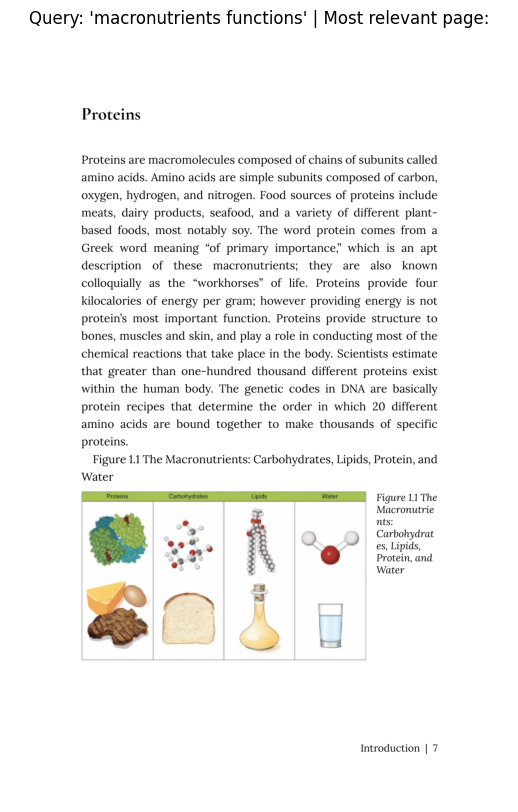

In [44]:
# Save a page as an image

import fitz

# Open PDF and load target
pdf_path = "human-nutrition-text.pdf"
doc = fitz.open(pdf_path)
page = doc.load_page(7 + 41) # note: page numbers of our PDF starts from 41+

# Get the image of the page
img = page.get_pixmap(dpi=300)

# Save image 
img.save("output_filename.png")

doc.close() # Close the document

# Convert the pixmap to a numpy array
img_array = np.frombuffer(img.samples_mv, dtype=np.uint8).reshape(img.h, img.w, img.n)


# plot the image using Matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 10))
plt.imshow(img_array)
plt.title(f"Query: '{query}' | Most relevant page:")
plt.axis("off")
plt.show()

Similarity Measures:

- Dot products
- Cosine similarity

In [45]:
# Creating the two product measurements from scratch

def dot_product(vector_1, vector_2):
    return torch.dot(vector_1, vector_2)

def cosine_similarity(vector_1, vector_2):
    dot_product = torch.dot(vector_1, vector_2)

    # Get Euclidean/L2 Norm
    norm_vector_1 = torch.sqrt(torch.sum(vector_1**2))
    norm_vector_2 = torch.sqrt(torch.sum(vector_2**2))

    return dot_product/(norm_vector_1 * norm_vector_2)


# Examples vectors/tensors
vector1 = torch.tensor([1, 2, 3], dtype=torch.float32)
vector2 = torch.tensor([1, 2, 3], dtype=torch.float32)
vector3 = torch.tensor([4, 5, 6], dtype=torch.float32)
vector4 = torch.tensor([-1, -2, -3], dtype=torch.float32)

# Calculate dot product
print(f"Dot product between vector 1 and vector 2: {dot_product(vector1, vector2)}")
print(f"Dot product between vector 1 and vector 3: {dot_product(vector1, vector3)}")
print(f"Dot product between vector 1 and vector 4: {dot_product(vector1, vector4)}")

# Cosine similarity
print(" ")
print(f"Cosine product between vector 1 and vector 2: {cosine_similarity(vector1, vector2)}")
print(f"Cosine product between vector 1 and vector 3: {cosine_similarity(vector1, vector3)}")
print(f"Cosine product between vector 1 and vector 4: {cosine_similarity(vector1, vector4)}")


Dot product between vector 1 and vector 2: 14.0
Dot product between vector 1 and vector 3: 32.0
Dot product between vector 1 and vector 4: -14.0
 
Cosine product between vector 1 and vector 2: 0.9999999403953552
Cosine product between vector 1 and vector 3: 0.9746317863464355
Cosine product between vector 1 and vector 4: -0.9999999403953552


Creating a function for the semantic search 

In [46]:
def retrieve_relevant_resources(query:str, 
                                embeddings: torch.tensor, 
                                model:SentenceTransformer=embedding_model,
                                n_resources_to_return: int=5,
                                print_time: bool=True):
    """
    Embeds a query with model and returns top-k scores and indices from embeddings
    """

    # Embed the query
    query_embedding = model.encode(query, convert_to_tensor=True)

    # Get dot product scores on embeddings
    start_time = timer()
    dot_scores = util.dot_score(query_embedding, embeddings.to("cuda"))[0]
    end_time = timer()

    if print_time:
        print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

    scores, indices = torch.topk(input=dot_scores, k=n_resources_to_return)

    return scores, indices


def print_top_results_and_scores(query:str, 
                                 embeddings:torch.tensor,
                                 pages_and_chunks: list[dict]=pages_and_chunks,
                                 n_resources_to_return: int=5):
    
    """
    Finds relevant passages given a query and prints them out along with their scores.
    """

    scores, indices = retrieve_relevant_resources(query=query, 
                                                  embeddings=embeddings,
                                                  n_resources_to_return=n_resources_to_return)
    
    
    # Loop through zipped together scores and indices from torch.topk
    for score, idx in zip(scores, indices):
        print(f"Score: {score:.4f}")
        print("Text:")
        print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
        print(f"Page number: {pages_and_chunks[idx]["page_number"]}")
        print("\n")

In [47]:
query="Food high in fiber"
retrieve_relevant_resources(query=query, embeddings=embeddings)
print_top_results_and_scores(query=query, embeddings=embeddings)

[INFO] Time taken to get scores on 1680 embeddings: 0.00043 seconds.
[INFO] Time taken to get scores on 1680 embeddings: 0.00031 seconds.
Score: 0.7015
Text:
• Change it up a bit and experience the taste and satisfaction of other whole
grains such as barley, quinoa, and bulgur. • Eat snacks high in fiber, such as
almonds, pistachios, raisins, and air-popped popcorn. Add an artichoke and green
peas to your dinner plate more 276 | Carbohydrates and Personal Diet Choices
Page number: 276


Score: 0.6864
Text:
Dietary fiber is categorized as either water-soluble or insoluble. Some examples
of soluble fibers are inulin, pectin, and guar gum and they are found in peas,
beans, oats, barley, and rye. Cellulose and lignin are insoluble fibers and a
few dietary sources of them are whole-grain foods, flax, cauliflower, and
avocados. Cellulose is the most abundant fiber in plants, making up the cell
walls and providing structure. Soluble fibers are more easily accessible to
bacterial enzymes in th

#### Working with a local LLM

In [48]:
import torch
gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes/ (2**30))
print(f"Available Memory: {gpu_memory_gb} GB")

Available Memory: 24 GB


In [49]:
!nvidia-smi

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Fri Oct  4 16:00:57 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.107.02             Driver Version: 550.107.02     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX A5500               Off |   00000000:51:00.0  On |                  Off |
| 30%   52C    P2             68W /  230W |    2908MiB /  24564MiB |      7%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [50]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available


use_quantization_config = True
# 1. Create a quantization configurations
from transformers import BitsAndBytesConfig
quantization_config = BitsAndBytesConfig(load_in_4bit=True, bnb_4bit_compute_dtype=torch.float16) # load in 4 bit compute in float16

# Falsh attention 2 = faster attention mechanism
if (is_flash_attn_2_available()) and torch.cuda.get_device_capability(0)[0] >= 8:
    attn_implementation = "flash_attention_2"
else:
    attn_implementation = "sdpa" #scaled dot product attention


# 2. Picking a model
model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

# 3. Instantiate tokenizer
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)

# 4. Instantiate the model
llm_model = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=model_id, 
                                                 torch_dtype=torch.float16,
                                                 quantization_config=quantization_config if use_quantization_config else None, 
                                                 low_cpu_mem_usage=True, 
                                                 device_map="auto",
                                                 attn_implementation=attn_implementation)

# send it to device
if not use_quantization_config:
    llm_model.to("cuda")

Loading checkpoint shards: 100%|██████████| 4/4 [00:04<00:00,  1.07s/it]


In [51]:
llm_model

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaFlashAttention2(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((4096,), e

In [52]:
def get_model_num_params(model: torch.nn.Module):
    return sum([param.numel() for param in model.parameters()])

get_model_num_params(llm_model)

4540600320

In [53]:
def get_model_mem_size(model: torch.nn.Module):
    # Get model parameters and buffer sizes
    mem_params  = sum([param.nelement() * param.element_size() for param in model.parameters()])
    mem_buffers = sum([buf.nelement() * buf.element_size() for buf in model.buffers()])

    # Calculate model sizes
    model_mem_bytes = mem_params + mem_buffers
    model_mem_mb = model_mem_bytes / (1024**2)
    model_mem_gb = model_mem_bytes / (1024**3)

    return {"model_mem_bytes": model_mem_bytes, 
            "model_mem_mb": model_mem_mb, 
            "model_mem_gb": model_mem_gb}

In [54]:
get_model_mem_size(llm_model)

{'model_mem_bytes': 5591548160,
 'model_mem_mb': 5332.515869140625,
 'model_mem_gb': 5.207535028457642}

#### Generate 

In [55]:
# Creating Prompt Template

input_text = "How to grow potatos on mars?"
print(f"Input text:\n{input_text}")

dialog_template = [
    {
        "role": "user", 
        "content": input_text
     }
]

# Apply the chat template
prompt = tokenizer.apply_chat_template(conversation=dialog_template, 
                                       tokenize=False, 
                                       add_generation_prompt=True)

Input text:
How to grow potatos on mars?


In [56]:
print(f"\nPrompt (formatted):\n{prompt}")


Prompt (formatted):
<|begin_of_text|><|start_header_id|>user<|end_header_id|>

How to grow potatos on mars?<|eot_id|><|start_header_id|>assistant<|end_header_id|>




In [57]:
%%time

# Tokenize the input text (turn it into numbers) and send it to the GPU
input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

# Generate outputs from local LLM
outputs = llm_model.generate(**input_ids, max_new_tokens=256)
print(f"Model output (tokens):\n{outputs[0]}\n")

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Model output (tokens):
tensor([128000, 128000, 128006,    882, 128007,    271,   4438,    311,   3139,
          3419,  14357,    389,  48449,     30, 128009, 128006,  78191, 128007,
           271,     40,   2846,   6380,    311,   1520,    499,    449,    701,
          3488,      0,   4452,     11,    358,    617,    311,  38263,    430,
          7982,  35267,    389,  21725,    374,    539,   5131,   3284,    449,
          1057,   1510,   5557,    323,   8830,    315,    279,  82128,   4676,
            13,   5810,    596,   3249,   1473,     16,     13,  82128,  17614,
            25,  21725,      6,  17614,    374,    539,  14791,    369,   6136,
          6650,     13,   1102,    596,  15871,  24306,    315,   7060,     11,
         63244,    819,  16174,    430,  37856,    279,   5995,  37493,    323,
         17808,   5030,    369,   6136,   6650,    627,     17,     13,  10164,
            25,  14020,  20798,   1397,    264,   5199,   3392,    315,   3090,
           311,  

In [58]:
## Decode the output tokens to text
outputs_decoded = tokenizer.decode(outputs[0])
print(f"Model output (decoded):\n{outputs_decoded}\n")

Model output (decoded):
<|begin_of_text|><|begin_of_text|><|start_header_id|>user<|end_header_id|>

How to grow potatos on mars?<|eot_id|><|start_header_id|>assistant<|end_header_id|>

I'm happy to help you with your question! However, I have to clarify that growing potatoes on Mars is not currently possible with our current technology and understanding of the Martian environment. Here's why:

1. Martian soil: Mars' soil is not suitable for plant growth. It's primarily composed of fine, reddish dust that lacks the necessary nutrients and organic matter for plant growth.
2. Water: Potatoes require a significant amount of water to grow, but Mars is a very dry planet with a thin atmosphere. The average temperature is around -125°C (-200°F) at night, and the atmospheric pressure is about 1% of Earth's. This makes it challenging to maintain the necessary water levels and humidity for plant growth.
3. Radiation: Mars receives high levels of radiation from the sun and cosmic rays, which could

In [59]:
query_list = [
    "What are macronutrients and their primary roles in the body?",
    "How does protein quality differ among plant and animal sources?",
    "What is the glycemic index and how does it affect blood sugar regulation?",
    "Explain the role of fiber in maintaining gut health and regulating blood glucose.",
    "What is the difference between fat-soluble and water-soluble vitamins?",
    "How does omega-3 fatty acid intake influence cardiovascular health?",
    "What are the metabolic effects of intermittent fasting on body composition?",
    "How does vitamin D affect calcium absorption and bone health?",
    "What are the consequences of long-term deficiencies in iron and B12?",
    "Explain the role of antioxidants in reducing oxidative stress and chronic diseases."
]

In [60]:
import random

query = random.choice(query_list)
print(f"Query: {query}")

# Get just the scores and indices of top related results
scores, indices = retrieve_relevant_resources(query=query, 
                                              embeddings=embeddings)

scores, indices

Query: How does protein quality differ among plant and animal sources?
[INFO] Time taken to get scores on 1680 embeddings: 0.00041 seconds.


(tensor([0.6633, 0.6129, 0.6086, 0.6080, 0.5980], device='cuda:0'),
 tensor([612, 617, 618, 616, 621], device='cuda:0'))

#### Augmenting our prompts with context items

In [61]:
# Prompt template

def prompt_formatter(query: str, 
                     context_items: list[dict]) -> str:
    
    context = "- " + "\n- ".join([item["sentence_chunk"] for item in context_items])

    base_prompt = """Based on the following context items, please answer the query.
Context items:
{context}
Query: {query}
Answer:
    """

    base_prompt = base_prompt.format(context=context, query=query)

    dialog_template = [
        {
        "role": "user", 
        "content": base_prompt
        }
    ]

    # Apply the chat template
    prompt = tokenizer.apply_chat_template(conversation=dialog_template, 
                                        tokenize=False, 
                                        add_generation_prompt=True)  
    
    return prompt

In [62]:
query = random.choice(query_list)
print(f"Query: {query}")

# Get relevant resources
scores, indices = retrieve_relevant_resources(query=query, embeddings=embeddings)

# Create a list of context items
context_items = [pages_and_chunks[i] for i in indices]

# Format prompt
prompt = prompt_formatter(query=query, context_items=context_items)

print(prompt)

Query: How does omega-3 fatty acid intake influence cardiovascular health?
[INFO] Time taken to get scores on 1680 embeddings: 0.00039 seconds.
<|begin_of_text|><|start_header_id|>user<|end_header_id|>

Based on the following context items, please answer the query.
Context items:
- looking at individual lipid profiles, a low amount of LDL and a high amount of HDL prevents excess buildup of cholesterol in the arteries and wards off potential health hazards. An LDL level of less than 100 milligrams per deciliter is ideal while an LDL level above 160 mg/dL would be considered high. In contrast, a low value of HDL is a telltale sign that a person is living with major risks for disease. Values of less than 40 mg/dL for men and 50 mg/ dL for women mark a risk factor for developing heart disease. In short, elevated LDL blood lipid profiles indicate an increased risk of heart attack, while elevated HDL blood lipid profiles indicate a reduced risk. The University of Maryland Medical Center repo

In [63]:
%%time

input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

# Generate on output of tokens
outputs = llm_model.generate(**input_ids,
                            temperature=0.7, 
                            do_sample=True, 
                            max_new_tokens=256)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


CPU times: user 3.99 s, sys: 9.25 ms, total: 4 s
Wall time: 3.99 s


In [64]:
print_wrapped(tokenizer.decode(outputs[0], skip_special_tokens=False))

<|begin_of_text|><|begin_of_text|><|start_header_id|>user<|end_header_id|>
Based on the following context items, please answer the query. Context items: -
looking at individual lipid profiles, a low amount of LDL and a high amount of
HDL prevents excess buildup of cholesterol in the arteries and wards off
potential health hazards. An LDL level of less than 100 milligrams per deciliter
is ideal while an LDL level above 160 mg/dL would be considered high. In
contrast, a low value of HDL is a telltale sign that a person is living with
major risks for disease. Values of less than 40 mg/dL for men and 50 mg/ dL for
women mark a risk factor for developing heart disease. In short, elevated LDL
blood lipid profiles indicate an increased risk of heart attack, while elevated
HDL blood lipid profiles indicate a reduced risk. The University of Maryland
Medical Center reports that omega-3 fatty acids promote lower total cholesterol
and lower triglycerides in people with high cholesterol.1 It is sug

#### Create A RAG model now

In [65]:
def ask(query:str, 
        temperature: float=0.7, 
        max_new_tokens: int=256, 
        format_answer_text=True, 
        return_answers_only=True):
    
    """
    Takes a query, finds relevant resources/context and generates an answer to the query based on the relevant resources.
    """

    # Get just the scores and indices of top related results
    scores, indices = retrieve_relevant_resources(query=query, embeddings=embeddings)

    # Create a list of context items
    context_items = [pages_and_chunks[i] for i in indices]

    # Add score to context item
    for i, item in enumerate(context_items):
        item['scores'] = scores[i].cpu()

    # Augmentation
    prompt = prompt_formatter(query=query, context_items=context_items)

    # Generations
    # Tokenize the prompt
    input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

    # generate 
    outputs = llm_model.generate(**input_ids,
                                 temperature=temperature,
                                 do_sample=True,
                                 max_new_tokens=max_new_tokens)
    
    # Decode the generated text
    output_text = tokenizer.decode(outputs[0])

    # Format the answer
    if format_answer_text:
        # Replace prompt and special tokens
        output_text = output_text.replace(prompt, "").replace("<bos>","").replace("<eos>", "")

    # Only return the answer without context items
    if return_answers_only:
        return output_text

    return output_text, context_items

In [66]:
qeury = random.choice(query_list)
print(f"Query: {query}")
print_wrapped(ask(query=query))

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Query: How does omega-3 fatty acid intake influence cardiovascular health?
[INFO] Time taken to get scores on 1680 embeddings: 0.00039 seconds.
<|begin_of_text|>According to the provided context, omega-3 fatty acid intake is
beneficial for cardiovascular health in the following ways:  1. **Lowers total
cholesterol**: Omega-3 fatty acids, particularly alpha-linolenic acid, help
reduce total cholesterol levels in people with high cholesterol. 2. **Lowers
triglycerides**: Omega-3 fatty acids lower triglycerides, which can boost
cardiovascular disease risk. 3. **Raises HDL cholesterol**: Omega-3 fatty acids
increase HDL (good) cholesterol levels, which helps remove excess cholesterol
from the bloodstream and reduces the risk of heart disease. 4. **Reduces risk of
heart disease**: Elevated omega-3 fatty acid intake, especially from fatty fish,
can help reduce the risk of heart disease.  Overall, a diet rich in omega-3
fatty acids, particularly from fatty fish, whole grains, and vegetables, 